Полезные цепочки:

ChainVectorDB:
https://python.langchain.com/api_reference/langchain/chains/langchain.chains.conversational_retrieval.base.ChatVectorDBChain.html

QuestionGeneratorChain: https://python.langchain.com/api_reference/langchain/chains/langchain.chains.flare.base.QuestionGeneratorChain.html

SimpleRequestChain -
Chain for making a simple request to an API endpoint.  https://python.langchain.com/api_reference/langchain/chains/langchain.chains.openai_functions.openapi.SimpleRequestChain.html

generate_example на основе других примеров: https://python.langchain.com/api_reference/langchain/chains/langchain.chains.example_generator.generate_example.html

Router Chain: https://python.langchain.com/api_reference/langchain/chains/langchain.chains.router.base.RouterChain.html


Склеиваем RAG с LangChain, HuggingFaceEmbeddings, transformers pipeline и BitsAndBytes!

In [ ]:
!pip install -q torch transformers accelerate bitsandbytes transformers sentence-transformers


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install -qU langchain-community faiss-cpu

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install langchain_classic

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install langchain-community


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install langchain-text-splitters

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Сдираем страничку с википедии про седлоносую жабу. Эта прелесть размером с ноготок, цвета тыквы, так еще и не умеет прыгать, потому что слишком маленькая! Я не шучу, это ее физиологическое ограничение: too small to jump!

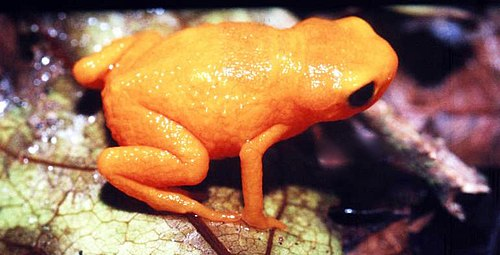

In [ ]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import wikipedia
import langchain_classic
from langchain_core.documents import Document

toad = wikipedia.page("Saddleback toad").content
doc = [Document(page_content=toad)]

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=30)

chunked_docs = splitter.split_documents(doc)

To create document chunk embeddings we’ll use the HuggingFaceEmbeddings and the BAAI/bge-base-en-v1.5 embeddings model.

To create the vector database, we’ll use FAISS, a library developed by Facebook AI. This library offers efficient similarity search and clustering of dense vectors.

We’ll access both the embeddings model and FAISS via LangChain API.

In [ ]:
pip install -U langchain-huggingface

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install hf_xet

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------------- -- 2.6/2.8 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 18.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
db = FAISS.from_documents(chunked_docs,
                          HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5'))

In [ ]:
retriever = db.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 4} # top 4 results
)

Теперь нужна модель.

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install -U bitsandbytes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from transformers import AutoTokenizer

# Создаем токенизатор отдельно
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-base-en-v1.5')

Квантизация модели с BitsAndBytes!

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_name = 'HuggingFaceH4/zephyr-7b-beta' #SweatyCrayfish/llama-3-8b-quantized

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(model_name)

d:\rag_langchain\lchenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]d:\rag_langchain\lchenv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bnuy\.cache\huggingface\hub\models--HuggingFaceH4--zephyr-7b-beta. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adm

In [ ]:
from langchain_community.llms import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate
from transformers import pipeline
from langchain_core.output_parsers import StrOutputParser

text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    temperature=0.2,
    do_sample=True,
    repetition_penalty=1.1,
    return_full_text=True,
    max_new_tokens=400,
)

llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

prompt_template = """
<|system|>
Answer the question based on your knowledge. Use the following context to help:

{context}

</s>
<|user|>
{question}
</s>
<|assistant|>

 """

prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=prompt_template,
)

llm_chain = prompt | llm | StrOutputParser()

Device set to use cpu
C:\Users\bnuy\AppData\Local\Temp\ipykernel_8536\4229534000.py:19: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=text_generation_pipeline)


Из LLM и ретривера собираем rag_chain

In [ ]:
from langchain_core.runnables import RunnablePassthrough

retriever = db.as_retriever()

rag_chain = (
 {"context": retriever, "question": RunnablePassthrough()}
    | llm_chain
)

Используем

In [ ]:
question = "What color is the frog?"

In [ ]:
# сначала можно спросить просто у llm
llm_chain.invoke({"context":"", "question": question})

'\n<|system|>\nAnswer the question based on your knowledge. Use the following context to help:\n\n\n\n</s>\n<|user|>\nWhat color is the frog?\n</s>\n<|assistant|>\n\n  I do not have information about which specific frog you are referring to. Please provide more context or a picture of the frog so I can accurately answer your question. Without any further information, I am unable to determine the color of the frog.'

Говорит, что не может ответить, нужно указать, про какую именно лягушку идет речь.

In [ ]:
# а теперь с рагом:
rag_chain.invoke(question)

'\n<|system|>\nAnswer the question based on your knowledge. Use the following context to help:\n\n[Document(id=\'ac02c1bd-6e65-426f-8ef1-815525ad7a8d\', metadata={}, page_content=\'Among the remaining species in the genus, almost all have both underparts and upperparts that are at least partially yellow or orange. They are collectively known as pumpkin toadlets, which is a reference to the colour. In some species, this colour is almost uniform throughout, earning them the name Brazilian gold frog (sometimes misapplied to the all-brown flea frog B. didactylus). However, in many species the yellow or orange is partial and incomplete. On the underparts, the yellow or orange may form a\'), Document(id=\'124c4c6a-d9df-4458-86ee-020a73ec5c11\', metadata={}, page_content=\'=== Colour and toxicity ===\\nThe different Brachycephalus vary greatly in colour and this is often useful for separating the species from each other. Within each species, there are often also some individual variations, es

Отвечает про нашу тыквенную лягушку!

> Among the remaining species in the genus, almost all have both underparts and upperparts that are at least partially yellow or orange.

